In [1]:
import numpy as np
import matplotlib.pyplot as plt
from smt.applications import MFK

___________________________________________________________________________
   
                                    MFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0210059
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 101
   
   Predicting ...
   Predicting - done. Time (sec):  0.0102122
   
   Prediction time/pt. (sec) :  0.0001011
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 101
   
   Predicting ...
   Predicting - done. Time (sec):  0.0050850
   
   Prediction time/pt. (sec) :  0.0000503
   


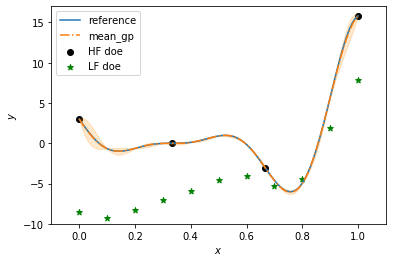

In [44]:
# Define the
def LF_function(x):
    import numpy as np

    return (
        0.5 * ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2)
        + (x - 0.5) * 10.0
        - 5
    )

def HF_function(x):
    import numpy as np

    return ((x * 6 - 2) ** 2) * np.sin((x * 6 - 2) * 2)

# Problem set up
ndim = 1
Xt_e = np.linspace(0, 1, 4, endpoint=True).reshape(-1, ndim)
Xt_c = np.linspace(0, 1, 11, endpoint=True).reshape(-1, ndim)

nt_exp = Xt_e.shape[0]
nt_cheap = Xt_c.shape[0]

# Evaluate the HF and LF functions
yt_e = HF_function(Xt_e)
yt_c = LF_function(Xt_c)

sm = MFK(theta0=np.array(Xt_e.shape[1] * [1.0]))

# low-fidelity dataset names being integers from 0 to level-1
sm.set_training_values(Xt_c, yt_c, name=0)
# high-fidelity dataset without name
sm.set_training_values(Xt_e, yt_e)

# train the model
sm.train()

x = np.linspace(0, 1, 101, endpoint=True).reshape(-1, 1)

# query the outputs
y = sm.predict_values(x)
MSE = sm.predict_variances(x)
der = sm.predict_derivatives(x, kx=0)

plt.figure()

plt.plot(x, HF_function(x), label="reference")
plt.plot(x, y, linestyle="-.", label="mean_gp")
plt.scatter(Xt_e, yt_e, marker="o", color="k", label="HF doe")
plt.scatter(Xt_c, yt_c, marker="*", color="g", label="LF doe")
plt.fill_between(x.ravel(), y.ravel() - 1.96*sigma.ravel(), y.ravel() + 1.96*sigma.ravel(), color='darkorange',
                 alpha=0.2)
plt.legend(loc=0)
plt.ylim(-10, 17)
plt.xlim(-0.1, 1.1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()